In [21]:
import urllib.request
import json
import pandas as pd
from pandas.io.json import json_normalize
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [23]:
key = '70564c7369726172313135416c615451'
start_date = date(2019,1,1)
columns_name = (['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'PAY_RIDE_NUM', 'FREE_RIDE_NUM',
       'PAY_ALIGHT_NUM', 'FREE_ALIGHT_NUM', 'WORK_DT'])
final_data = pd.DataFrame(columns = columns_name ) # 데이터프레임 생성 - 컬럼명 맞추기
for i in range(1, 25):
    target_date = start_date.strftime('%Y%m')
    url = 'http://openapi.seoul.go.kr:8088/%s/json/CardSubwayPayFree/1/1000/%s/'%(key, target_date)
    result = urllib.request.urlopen(url)
    json_raw_data = result.read()
    json_utf8 = json_raw_data.decode('utf-8')
    json_complete = json.loads(json_utf8)
    monthly_plus_data = pd.DataFrame(json_complete['CardSubwayPayFree']['row'])
    final_data = pd.concat([final_data, monthly_plus_data], ignore_index = True)
    plus_month = relativedelta(months=1) # 월 더하기
    start_date = start_date + plus_month
final_data

,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM,WORK_DT
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0,20190203
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0,20190203
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0,20190203
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0,20190203
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0,20190203
...,...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0,20210103
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0,20210103
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0,20210103
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0,20210103


In [24]:
free_ride2019 = final_data[:7978]
free_ride2019

,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM,WORK_DT
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0,20190203
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0,20190203
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0,20190203
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0,20190203
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0,20190203
...,...,...,...,...,...,...,...,...
7973,201912,중앙선,망우,182610.0,75024.0,174578.0,75724.0,20200103
7974,201912,중앙선,지평,1045.0,643.0,676.0,576.0,20200103
7975,201912,중앙선,회기,776871.0,138653.0,740548.0,137673.0,20200103
7976,201912,중앙선,도농,254011.0,68531.0,219355.0,66085.0,20200103


In [25]:
free_ride2019.drop(columns =['SUB_STA_NM','PAY_RIDE_NUM','PAY_ALIGHT_NUM','FREE_ALIGHT_NUM','WORK_DT'], inplace=True)
free_ride2019

c:\Users\rx178\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,USE_MON,LINE_NUM,FREE_RIDE_NUM
0,201901,경의선,4209.0
1,201901,1호선,275447.0
2,201901,1호선,162410.0
3,201901,1호선,352121.0
4,201901,1호선,221180.0
...,...,...,...
7973,201912,중앙선,75024.0
7974,201912,중앙선,643.0
7975,201912,중앙선,138653.0
7976,201912,중앙선,68531.0


In [26]:
free_ride2019 = free_ride2019.groupby('LINE_NUM')[['FREE_RIDE_NUM']].sum()
free_ride2019.sort_values(by = 'FREE_RIDE_NUM', axis=0, ascending=True, inplace = True)
free_ride2019

,FREE_RIDE_NUM
LINE_NUM,
장항선,1445968.0
경강선,1860149.0
공항철도 1호선,3456247.0
수인선,3626764.0
경춘선,3741592.0
9호선2~3단계,5052687.0
우이신설선,5319215.0
과천선,6515703.0
안산선,6701519.0


Text(0, 0.5, '무임승차건')

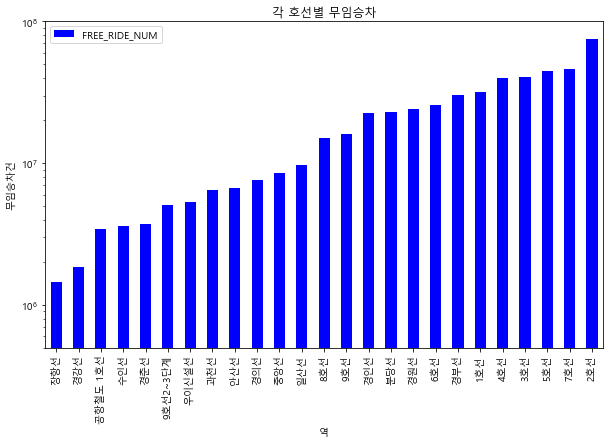

In [27]:
free_ride2019.plot(logy = True, ylim=(500000, 100000000), kind = 'bar', figsize = (10, 6), color = 'Blue')
plt.title('각 호선별 무임승차')
plt.xlabel('역')
plt.ylabel('무임승차건')

In [28]:
free_ride2020 = final_data[7979:]
free_ride2020

,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM,WORK_DT
7979,202001,9호선,염창,426975.0,66334.0,408275.0,65246.0,20200203
7980,202001,1호선,제기동,260659.0,335767.0,255740.0,360747.0,20200203
7981,202001,1호선,청량리(서울시립대입구),400999.0,316427.0,406766.0,322368.0,20200203
7982,202001,1호선,동묘앞,156787.0,141311.0,168473.0,143603.0,20200203
7983,202001,1호선,신설동,323258.0,117081.0,316893.0,110677.0,20200203
...,...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0,20210103
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0,20210103
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0,20210103
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0,20210103


In [29]:
free_ride2020.drop(columns =['SUB_STA_NM','PAY_RIDE_NUM','PAY_ALIGHT_NUM','FREE_ALIGHT_NUM','WORK_DT'], inplace=True)
free_ride2020

c:\Users\rx178\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,USE_MON,LINE_NUM,FREE_RIDE_NUM
7979,202001,9호선,66334.0
7980,202001,1호선,335767.0
7981,202001,1호선,316427.0
7982,202001,1호선,141311.0
7983,202001,1호선,117081.0
...,...,...,...
15169,202012,중앙선,11941.0
15170,202012,중앙선,86386.0
15171,202012,중앙선,39617.0
15172,202012,중앙선,5036.0


In [30]:
free_ride2020 = free_ride2020.groupby('LINE_NUM')[['FREE_RIDE_NUM']].sum()
free_ride2020.sort_values(by = 'FREE_RIDE_NUM', axis=0, ascending=True, inplace = True)
free_ride2020

,FREE_RIDE_NUM
LINE_NUM,
장항선,826879.0
경강선,1151354.0
공항철도 1호선,2235697.0
수인선,2800040.0
경춘선,2880457.0
9호선2~3단계,3356551.0
과천선,4064471.0
우이신설선,4198999.0
안산선,4808470.0


In [31]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, '무임승차건')

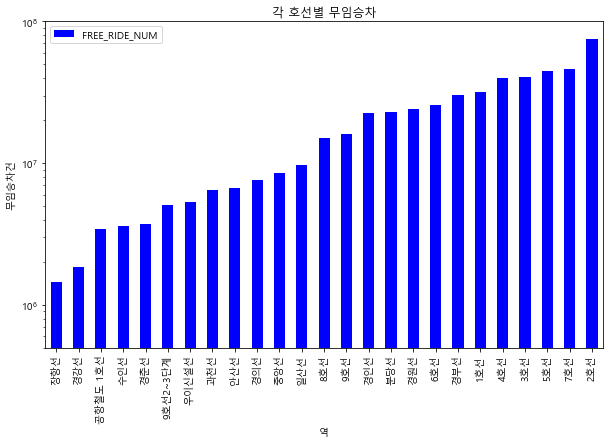

In [32]:
free_ride2019.plot(logy = True, ylim=(500000, 100000000), kind = 'bar', figsize = (10, 6), color = 'Blue')
plt.title('각 호선별 무임승차')
plt.xlabel('역')
plt.ylabel('무임승차건')

Text(0, 0.5, '무임승차건')

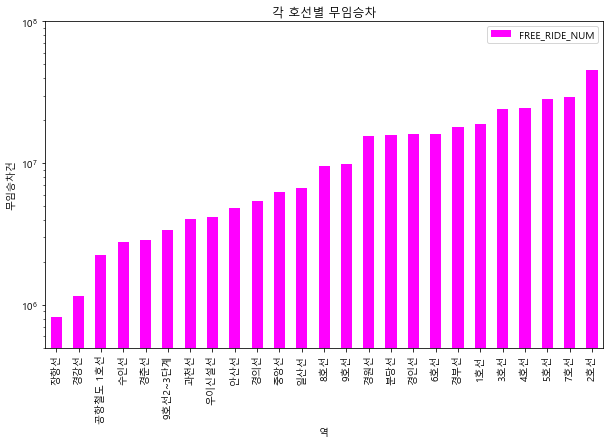

In [33]:
free_ride2020.plot(logy = True, ylim=(500000, 100000000), kind = 'bar', figsize = (10, 6), color = 'magenta')
plt.title('각 호선별 무임승차')
plt.xlabel('역')
plt.ylabel('무임승차건')